In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # visualization
from scipy.stats import kstest,shapiro,normaltest
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor


# Data Gathering

In [53]:
df=pd.read_csv(r"C:\Users\Rutuja Salunke\Downloads\diamonds (1).csv")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# EDA

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [55]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [56]:
df.shape

(53940, 10)

In [57]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## Feature Engineering

<Axes: >

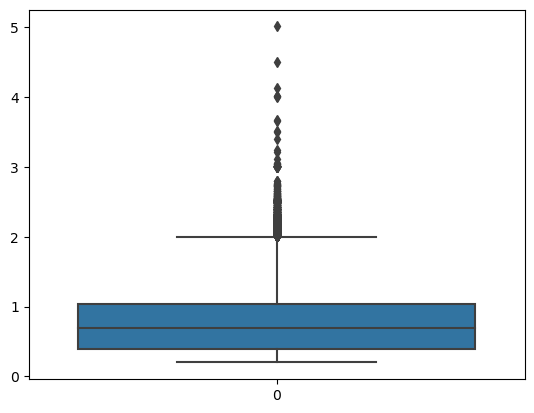

In [58]:
sns.boxplot(df["carat"])

### Checking Outliers

In [59]:
q1 = df["carat"].quantile(0.25) 
q2 = df["carat"].quantile(0.50) 
q3 = df["carat"].quantile(0.75) 

iqr = q3-q1

lower_tail = q1 - 1.5*iqr
upper_tail = q3 + 1.5*iqr

lower_tail

-0.5599999999999999

In [60]:
upper_tail

2.0

In [61]:
def outliers(n):

    q1 = np.percentile(n,25)
    q3 = np.percentile(n,75)

    iqr = q3 - q1

    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    

    outliers = [i for i in n if i < lower_tail or i > upper_tail]
    return outliers

In [62]:
n=df["carat"]
outliers(n)

[2.06,
 2.14,
 2.15,
 2.22,
 2.01,
 2.01,
 2.27,
 2.03,
 2.03,
 2.06,
 2.08,
 2.49,
 2.01,
 2.14,
 2.02,
 2.02,
 2.15,
 2.03,
 2.03,
 2.07,
 3.0,
 2.21,
 2.22,
 2.01,
 2.1,
 2.1,
 2.25,
 2.01,
 2.03,
 2.17,
 2.32,
 2.72,
 2.23,
 2.11,
 2.01,
 2.05,
 2.25,
 2.27,
 2.3,
 2.31,
 2.01,
 2.04,
 2.03,
 2.12,
 2.11,
 2.5,
 2.2,
 2.01,
 3.01,
 3.0,
 2.01,
 2.01,
 2.33,
 2.04,
 2.04,
 2.68,
 2.25,
 2.5,
 2.34,
 2.02,
 2.16,
 2.5,
 2.01,
 2.74,
 2.01,
 2.16,
 2.28,
 2.25,
 2.17,
 2.02,
 2.03,
 2.04,
 2.03,
 2.01,
 2.01,
 2.01,
 2.68,
 2.43,
 2.01,
 2.04,
 2.02,
 2.01,
 2.06,
 2.01,
 2.04,
 3.11,
 2.05,
 2.05,
 2.05,
 2.02,
 2.02,
 2.04,
 3.01,
 2.06,
 2.01,
 2.09,
 2.52,
 2.19,
 2.02,
 2.09,
 2.01,
 2.01,
 2.01,
 2.01,
 2.01,
 2.04,
 2.14,
 2.18,
 2.01,
 2.01,
 2.01,
 2.02,
 2.77,
 2.63,
 3.05,
 2.1,
 2.46,
 2.01,
 2.01,
 2.02,
 3.02,
 2.63,
 2.22,
 2.02,
 2.01,
 2.01,
 2.38,
 2.06,
 3.01,
 2.01,
 2.01,
 2.01,
 2.02,
 3.0,
 2.03,
 2.01,
 2.01,
 2.24,
 2.32,
 2.01,
 2.06,
 2.3,
 2.02,
 2.2,
 2.07

### Finding Outlier

In [63]:
def find_iqr(df,n):
    q1=df[n].quantile(0.25)
    q3=df[n].quantile(0.75)
    iqr=q3-q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    print(lower_tail)
    print(upper_tail)
    df[n]=df[n].apply(lambda x: upper_tail if x>upper_tail else(lower_tail if x<lower_tail else x))
n="carat"
find_iqr(df,n)

-0.5599999999999999
2.0


In [64]:
df["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [65]:
df["cut"]=df["cut"].replace({'Ideal':0, 'Premium':1, 'Good':2, 'Very Good':3, 'Fair':4})
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,0,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,1,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [66]:
df["color"].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [67]:
df["color"].replace({'E':0, 'I':1, 'J':2, 'H':3, 'F':4, 'G':5, 'D':6},inplace=True)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,0,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,0,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,0,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,1,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,2,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,0,6,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,6,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,6,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,1,3,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [68]:
df["clarity"].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [69]:
from sklearn.preprocessing import LabelEncoder
L=LabelEncoder()
df2=L.fit_transform(df["clarity"])
df["Clarity"]=L.fit_transform(df["clarity"])
df

,carat,cut,color,clarity,depth,table,price,x,y,z,Clarity
0,0.23,0,0,SI2,61.5,55.0,326,3.95,3.98,2.43,3
1,0.21,1,0,SI1,59.8,61.0,326,3.89,3.84,2.31,2
2,0.23,2,0,VS1,56.9,65.0,327,4.05,4.07,2.31,4
3,0.29,1,1,VS2,62.4,58.0,334,4.20,4.23,2.63,5
4,0.31,2,2,SI2,63.3,58.0,335,4.34,4.35,2.75,3
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,0,6,SI1,60.8,57.0,2757,5.75,5.76,3.50,2
53936,0.72,2,6,SI1,63.1,55.0,2757,5.69,5.75,3.61,2
53937,0.70,3,6,SI1,62.8,60.0,2757,5.66,5.68,3.56,2
53938,0.86,1,3,SI2,61.0,58.0,2757,6.15,6.12,3.74,3


In [70]:
df.drop("clarity",axis=1,inplace=True)
df

,carat,cut,color,depth,table,price,x,y,z,Clarity
0,0.23,0,0,61.5,55.0,326,3.95,3.98,2.43,3
1,0.21,1,0,59.8,61.0,326,3.89,3.84,2.31,2
2,0.23,2,0,56.9,65.0,327,4.05,4.07,2.31,4
3,0.29,1,1,62.4,58.0,334,4.20,4.23,2.63,5
4,0.31,2,2,63.3,58.0,335,4.34,4.35,2.75,3
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,0,6,60.8,57.0,2757,5.75,5.76,3.50,2
53936,0.72,2,6,63.1,55.0,2757,5.69,5.75,3.61,2
53937,0.70,3,6,62.8,60.0,2757,5.66,5.68,3.56,2
53938,0.86,1,3,61.0,58.0,2757,6.15,6.12,3.74,3


# Feature Selection

### 1.Linearity

In [71]:
df.corr()

,carat,cut,color,depth,table,price,x,y,z,Clarity
carat,1.000000,0.115940,-0.063092,0.026708,0.184356,0.922484,0.980450,0.957223,0.958695,-0.213409
cut,0.115940,1.000000,-0.029128,0.169916,0.381988,0.049421,0.105361,0.105319,0.126726,-0.091609
color,-0.063092,-0.029128,1.000000,-0.001665,-0.033998,-0.016560,-0.055268,-0.054762,-0.055684,0.009029
depth,0.026708,0.169916,-0.001665,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924,-0.053080
table,0.184356,0.381988,-0.033998,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929,-0.088223
price,0.922484,0.049421,-0.016560,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249,-0.071535
x,0.980450,0.105361,-0.055268,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772,-0.225721
y,0.957223,0.105319,-0.054762,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006,-0.217616
z,0.958695,0.126726,-0.055684,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000,-0.224263
Clarity,-0.213409,-0.091609,0.009029,-0.053080,-0.088223,-0.071535,-0.225721,-0.217616,-0.224263,1.000000


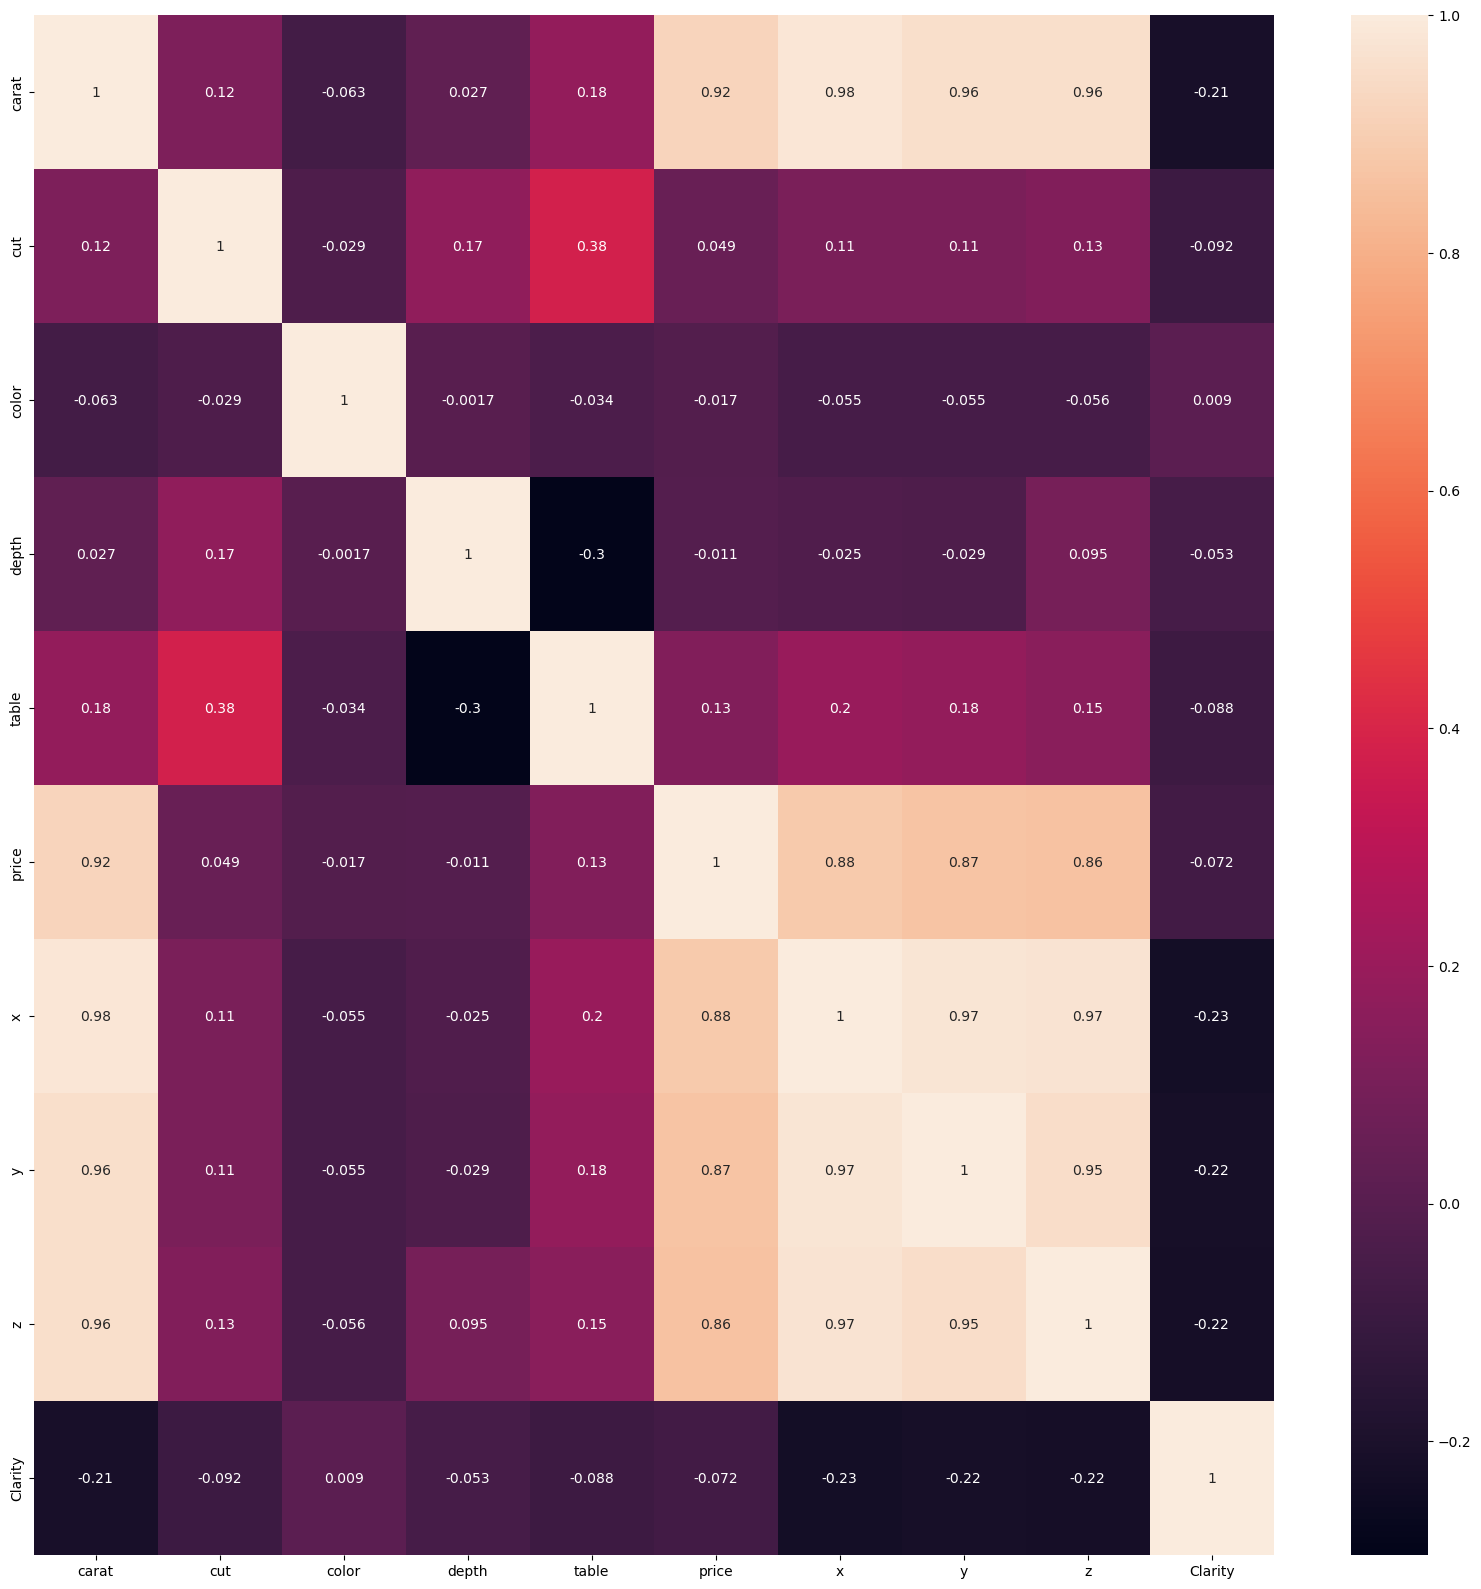

In [111]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.savefig("HEATMAP")

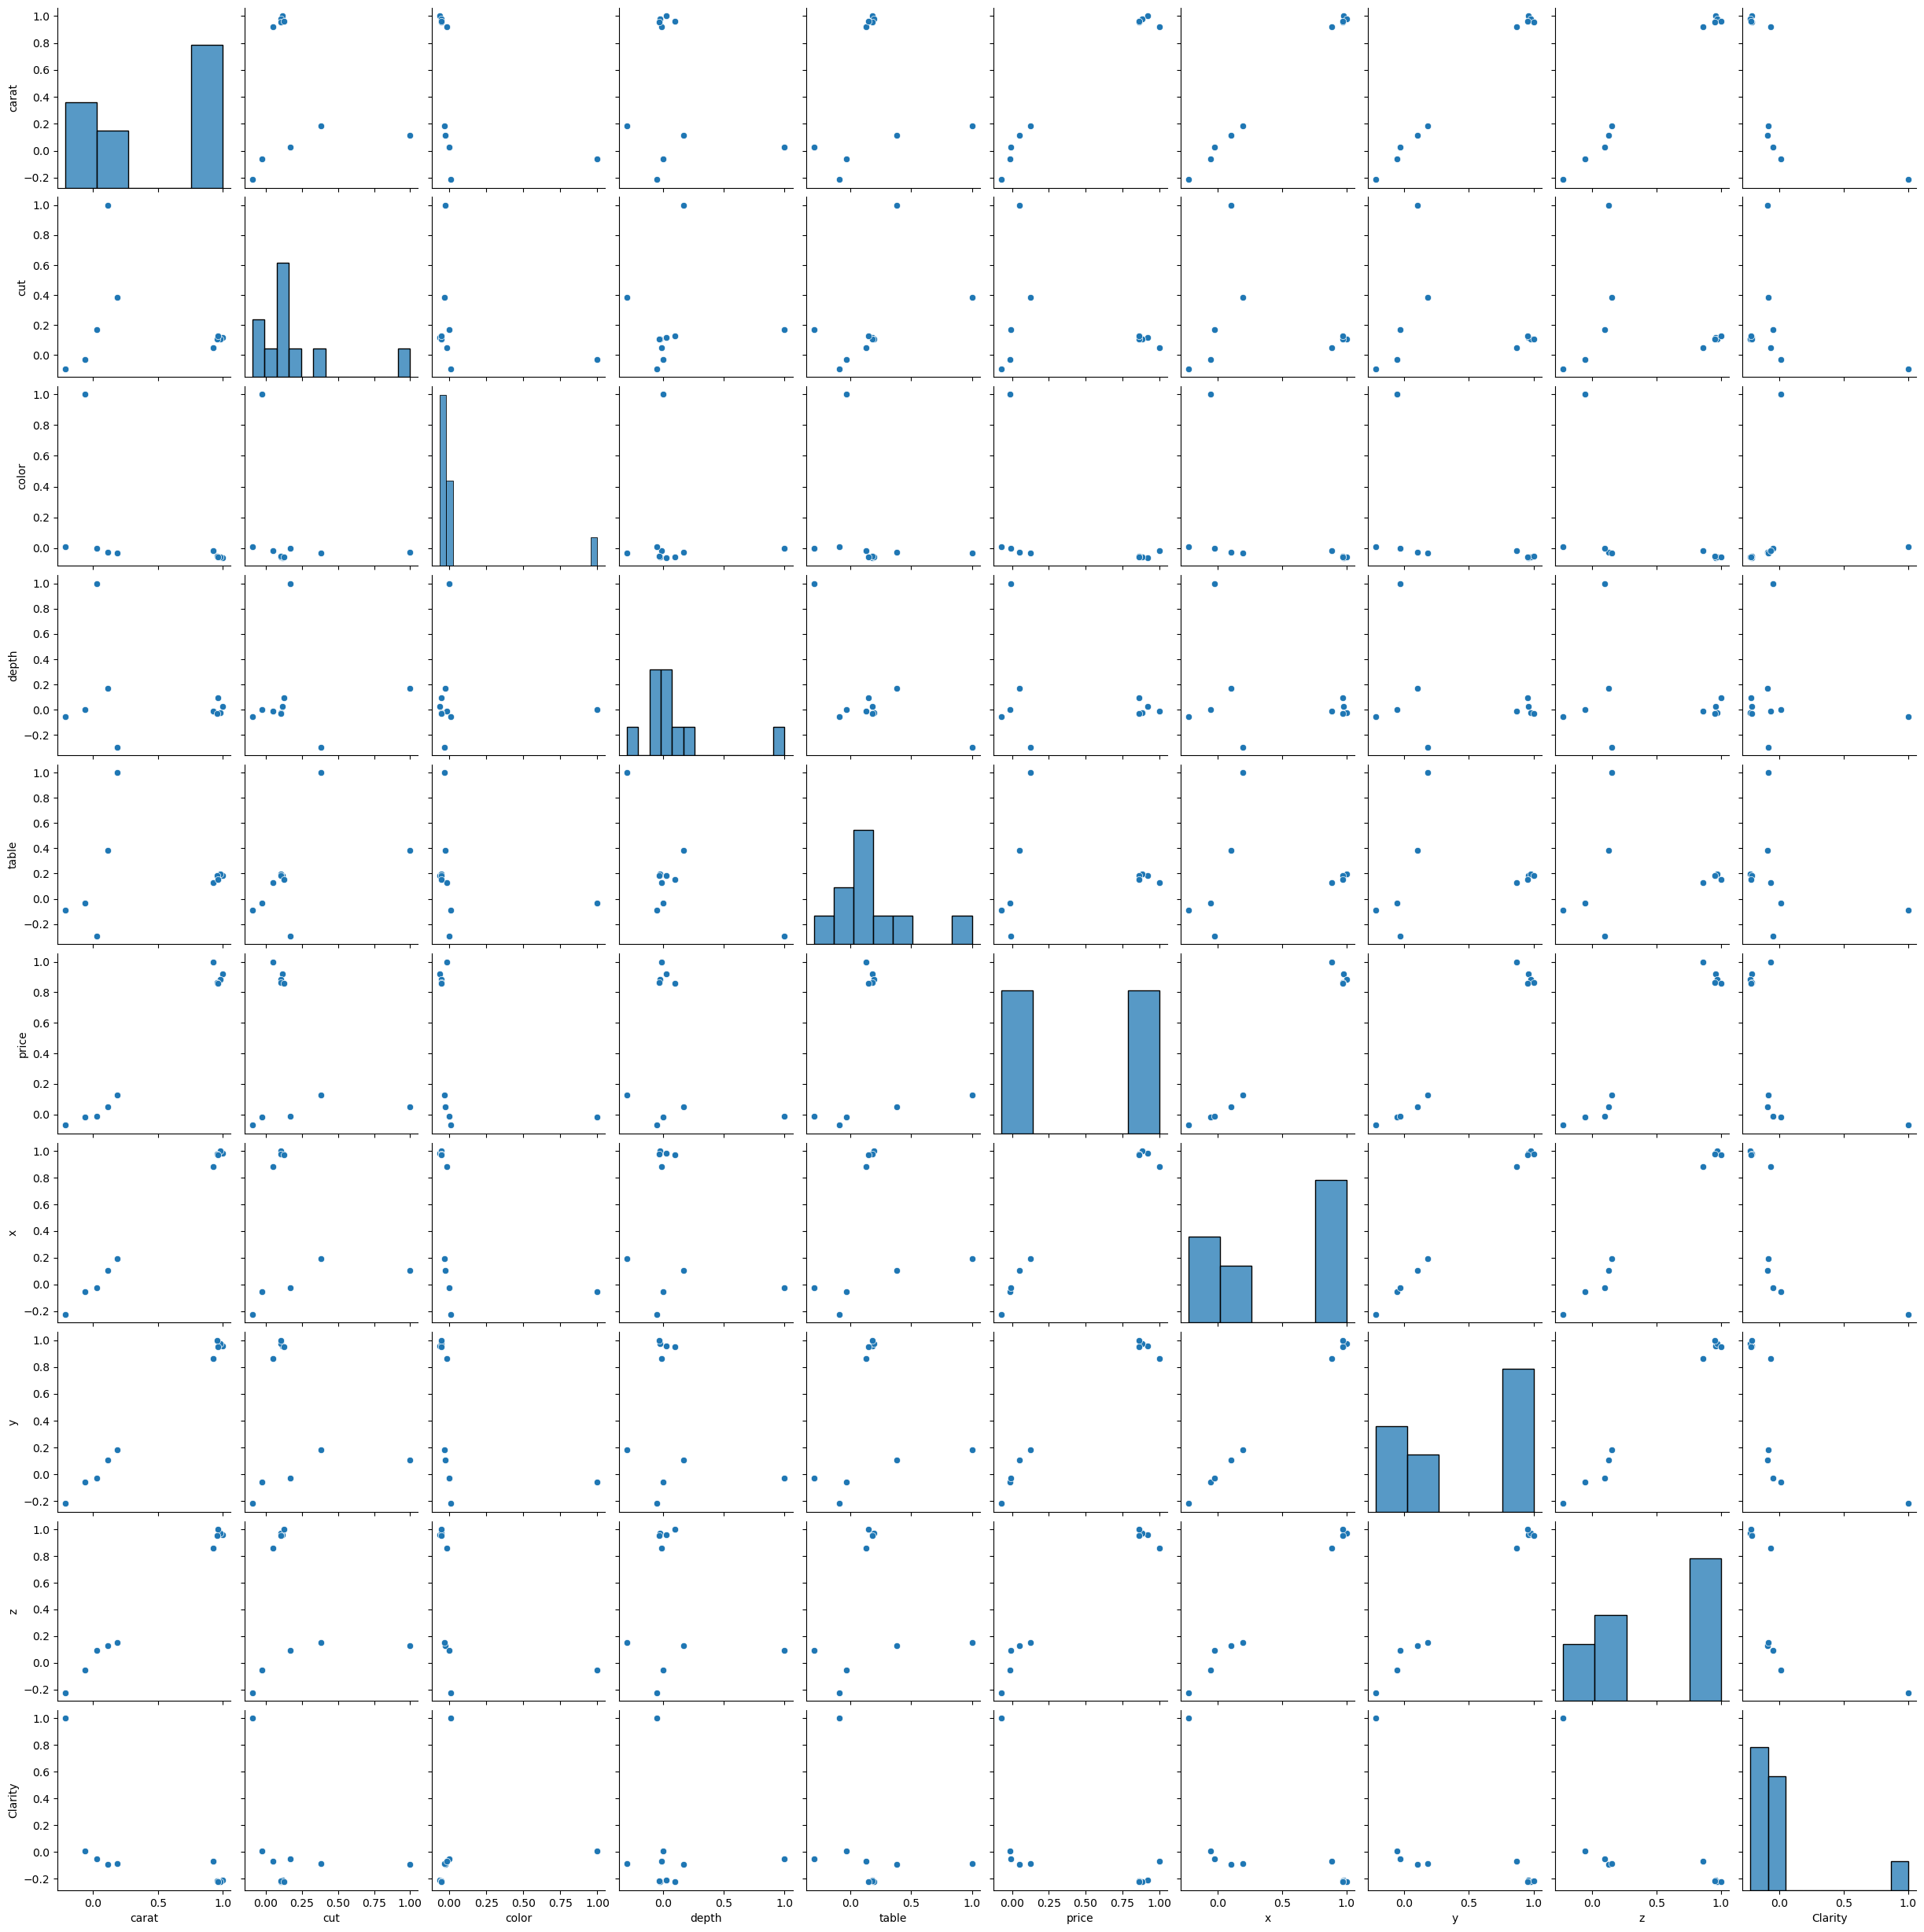

In [112]:
sns.pairplot(df.corr())
plt.savefig("PAIRPLOT")

#### 2.No Multicolinearity

In [72]:
df1=df.drop(["price"],axis=1)
df1

,carat,cut,color,depth,table,x,y,z,Clarity
0,0.23,0,0,61.5,55.0,3.95,3.98,2.43,3
1,0.21,1,0,59.8,61.0,3.89,3.84,2.31,2
2,0.23,2,0,56.9,65.0,4.05,4.07,2.31,4
3,0.29,1,1,62.4,58.0,4.20,4.23,2.63,5
4,0.31,2,2,63.3,58.0,4.34,4.35,2.75,3
...,...,...,...,...,...,...,...,...,...
53935,0.72,0,6,60.8,57.0,5.75,5.76,3.50,2
53936,0.72,2,6,63.1,55.0,5.69,5.75,3.61,2
53937,0.70,3,6,62.8,60.0,5.66,5.68,3.56,2
53938,0.86,1,3,61.0,58.0,6.15,6.12,3.74,3


In [73]:
vif_df=pd.DataFrame()
vif_df["Features"]=df1.columns
vif_df

,Features
0,carat
1,cut
2,color
3,depth
4,table
5,x
6,y
7,z
8,Clarity


In [74]:
vif_list=[]
for i in range(df1.shape[1]):
    vif=variance_inflation_factor(df1.to_numpy(),i)
    vif_list.append(vif)
vif_list

[93.7541467221386,
 2.224504839596408,
 3.4172364991513784,
 555.4140782646153,
 557.938711228508,
 1417.8465513431192,
 531.1789774528038,
 559.1310231609909,
 6.242527650781779]

In [75]:
vif_df["VIF"]=vif_list


In [76]:
vif_df

,Features,VIF
0,carat,93.754147
1,cut,2.224505
2,color,3.417236
3,depth,555.414078
4,table,557.938711
5,x,1417.846551
6,y,531.178977
7,z,559.131023
8,Clarity,6.242528


In [77]:
x=df1
y=df["price"]
x

,carat,cut,color,depth,table,x,y,z,Clarity
0,0.23,0,0,61.5,55.0,3.95,3.98,2.43,3
1,0.21,1,0,59.8,61.0,3.89,3.84,2.31,2
2,0.23,2,0,56.9,65.0,4.05,4.07,2.31,4
3,0.29,1,1,62.4,58.0,4.20,4.23,2.63,5
4,0.31,2,2,63.3,58.0,4.34,4.35,2.75,3
...,...,...,...,...,...,...,...,...,...
53935,0.72,0,6,60.8,57.0,5.75,5.76,3.50,2
53936,0.72,2,6,63.1,55.0,5.69,5.75,3.61,2
53937,0.70,3,6,62.8,60.0,5.66,5.68,3.56,2
53938,0.86,1,3,61.0,58.0,6.15,6.12,3.74,3


### train test split

In [78]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.1,random_state=10)

In [79]:
xtrain.shape

(48546, 9)

# Model Training

In [80]:
lin_reg=LinearRegression()
lin_reg

LinearRegression()

In [81]:
lin_reg_model=lin_reg.fit(xtrain,ytrain)
lin_reg_model

LinearRegression()

In [82]:
ytrain_predict=lin_reg_model.predict(xtrain) # on train data

In [83]:
ytest_predict=lin_reg_model.predict(xtest) # On testing data

#### 3.Normality of Residual

In [84]:
residual_train=ytrain=ytrain_predict
residual_train

array([9744.04225386, 5868.48383295, 2015.25906456, ..., -274.16335355,
       1040.59049061, 7166.87175043])

#### Kde Plot

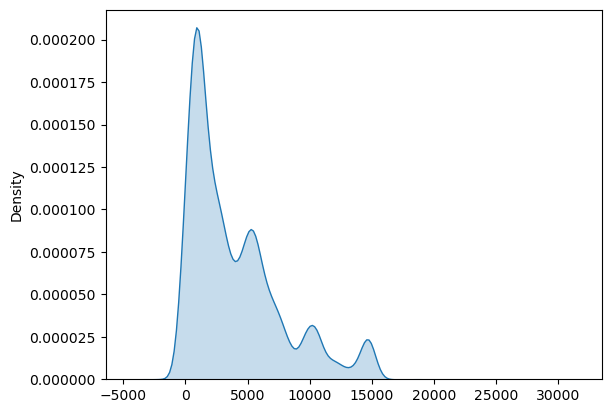

In [110]:
sns.kdeplot(residual_train,fill=True)
plt.savefig("KDE_PLOT")

#### Hypothesis testing

In [85]:
from scipy.stats import shapiro,normaltest,kstest
P_val,stats=shapiro(residual_train)
if P_val>=0.5:
    print("Null Hypothesis H0 is True")
else:
    print("Alternate Hypothesis H1 is True")

Null Hypothesis H0 is True


C:\ProgramData\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [86]:
P_val,stats=normaltest(residual_train)
if P_val>=0.5:
    print("Null Hypothesis H0 is True")
else:
    print("Alternate Hypothesis H1 is True")

Null Hypothesis H0 is True


In [87]:
P_val,stats=kstest(residual_train,"norm")
if P_val>=0.5:
    print("Null Hypothesis H0 is True")
else:
    print("Alternate Hypothesis H1 is True")

Null Hypothesis H0 is True


#### 4.Homoscedasticity

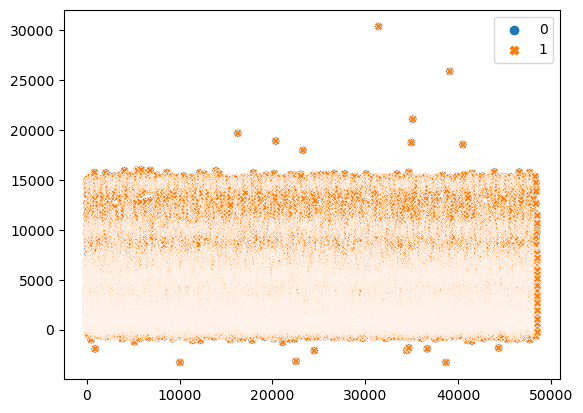

In [109]:
sns.scatterplot((ytrain,residual_train))
plt.savefig("SCATTERPLOT")

# Model Evaluation

In [88]:
print("***Model Evaluation on training data***")
mse = mean_squared_error(ytrain,ytrain_predict)
print("Mean squared Error = ",mse)


mae = mean_absolute_error(ytrain,ytrain_predict)
print("Mean absolute Error = ",mae)


rmse = np.sqrt(mse)
print("Root Mean squared Error = ",rmse)


r2score = r2_score(ytrain,ytrain_predict)
print("R2 score = ",r2score)


***Model Evaluation on training data***
Mean squared Error =  0.0
Mean absolute Error =  0.0
Root Mean squared Error =  0.0
R2 score =  1.0


In [89]:
print("**Model Evaluation on Testing Data**")
mse = mean_squared_error(ytest,ytest_predict)
print("Mean squared Error = ",mse)


mae = mean_absolute_error(ytest,ytest_predict)
print("Mean absolute Error = ",mae)


rmse = np.sqrt(mse)
print("Root Mean squared Error = ",rmse)


r2score = r2_score(ytest,ytest_predict)
print("R2 score = ",r2score)


**Model Evaluation on Testing Data**
Mean squared Error =  1882286.2037579257
Mean absolute Error =  875.6611522695027
Root Mean squared Error =  1371.9643595071723
R2 score =  0.8838080134978629


# Decision Tree

In [90]:
dt=DecisionTreeRegressor()
dt

DecisionTreeRegressor()

In [91]:
dt_model=dt.fit(xtrain,ytrain)
dt_model

DecisionTreeRegressor()

In [92]:
ytrain_predict=dt_model.predict(xtrain)
ytrain_predict

array([9744.04225386, 5868.48383295, 2015.25906456, ..., -274.16335355,
       1040.59049061, 7166.87175043])

In [93]:

mse = mean_squared_error(ytrain,ytrain_predict)
print("Mean squared Error = ",mse)

mae = mean_absolute_error(ytrain,ytrain_predict)
print("Mean absolute Error = ",mae)

rmse = np.sqrt(mse)
print("Root Mean squared Error = ",rmse)

r2score = r2_score(ytrain,ytrain_predict)
print("R2 score = ",r2score)

Mean squared Error =  0.0
Mean absolute Error =  0.0
Root Mean squared Error =  0.0
R2 score =  1.0


In [94]:
ytest_predict=dt_model.predict(xtest)

In [95]:

mse = mean_squared_error(ytest,ytest_predict)
print("Mean squared Error = ",mse)

mae = mean_absolute_error(ytest,ytest_predict)
print("Mean absolute Error = ",mae)

rmse = np.sqrt(mse)
print("Root Mean squared Error = ",rmse)

r2score = r2_score(ytest,ytest_predict)
print("R2 score = ",r2score)


Mean squared Error =  1885404.8329967677
Mean absolute Error =  876.9758967511281
Root Mean squared Error =  1373.1004453414062
R2 score =  0.883615503067886


# Random Forest



In [96]:
random_model=RandomForestRegressor()
random_model

RandomForestRegressor()

In [97]:
random_model_reg=random_model.fit(xtrain,ytrain)
random_model_reg

RandomForestRegressor()

In [98]:
y_train_predict=random_model_reg.predict(xtrain) # On training
y_train_predict

array([9698.43978831, 5876.4308762 , 2032.01904529, ..., -279.18276591,
       1088.17457262, 7182.30387784])

In [99]:
mse = mean_squared_error(ytrain,y_train_predict)
print("Mean squared Error = ",mse)

mae = mean_absolute_error(ytrain,y_train_predict)
print("Mean absolute Error = ",mae)

rmse = np.sqrt(mse)
print("Root Mean squared Error = ",rmse)

r2score = r2_score(ytrain,y_train_predict)
print("R2 score = ",r2score)

Mean squared Error =  4550.744397574696
Mean absolute Error =  28.99518426274605
Root Mean squared Error =  67.45920543242929
R2 score =  0.9996758732710992


In [100]:
y_test_predict=random_model_reg.predict(xtest) # On testing
y_test_predict

array([ 4643.96938956,  2938.40695053,  6233.14986059, ...,
         779.30728163,  5680.16889229, 14524.60240199])

In [101]:
mse = mean_squared_error(ytest,y_test_predict)
print("Mean squared Error = ",mse)

mae = mean_absolute_error(ytest,y_test_predict)
print("Mean absolute Error = ",mae)

rmse = np.sqrt(mse)
print("Root Mean squared Error = ",rmse)

r2score = r2_score(ytest,y_test_predict)
print("R2 score = ",r2score)

Mean squared Error =  1878149.0584894258
Mean absolute Error =  870.3421838295656
Root Mean squared Error =  1370.4557849450764
R2 score =  0.8840633960885843


In [102]:
class linear_reg():
    def Input(self):
        self.carat=float(input("Enter carat="))
        self.cut=float(input("Enter cut="))
        self.color=float(input("Enter color="))
        self.depth=float(input("Enter depth="))
        self.table=float(input("Enter table="))
        self.x=float(input("Enter x="))
        self.y=float(input("Enter y="))
        self.z=float(input("Enter z="))
        self.Clarity=float(input("Enter Clarity="))
    def Output(self):
        df=pd.DataFrame([[self.carat,self.cut,self.color, self.depth,self.table,self.x,self.y,self.z,self.Clarity]],columns=["carat","cut","color","depth","table","x","y","z","Clarity"])
        return lin_reg_model.predict(df)

In [103]:
obj=linear_reg()
obj

In [107]:
obj.Input()

Enter carat=0.75
Enter cut=0
Enter color=6
Enter depth=62.2
Enter table=55.0
Enter x=5.83
Enter y=5.87
Enter z=3.64
Enter Clarity=3


In [108]:
obj.Output()

array([3407.02128601])